WASTE MANAGEMENT USING CNN MODEL

In [ ]:
pip install opencv.python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow

In [2]:
#import necessary librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "DATASET\TRAIN"
test_path = "DATASET\TEST"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
#Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [01:31<00:00, 108.71it/s]


In [6]:
data.shape

(22564, 2)

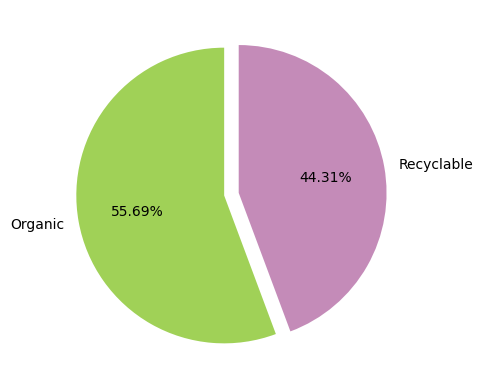

In [7]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90, explode = [0.05, 0.05])
plt.show()

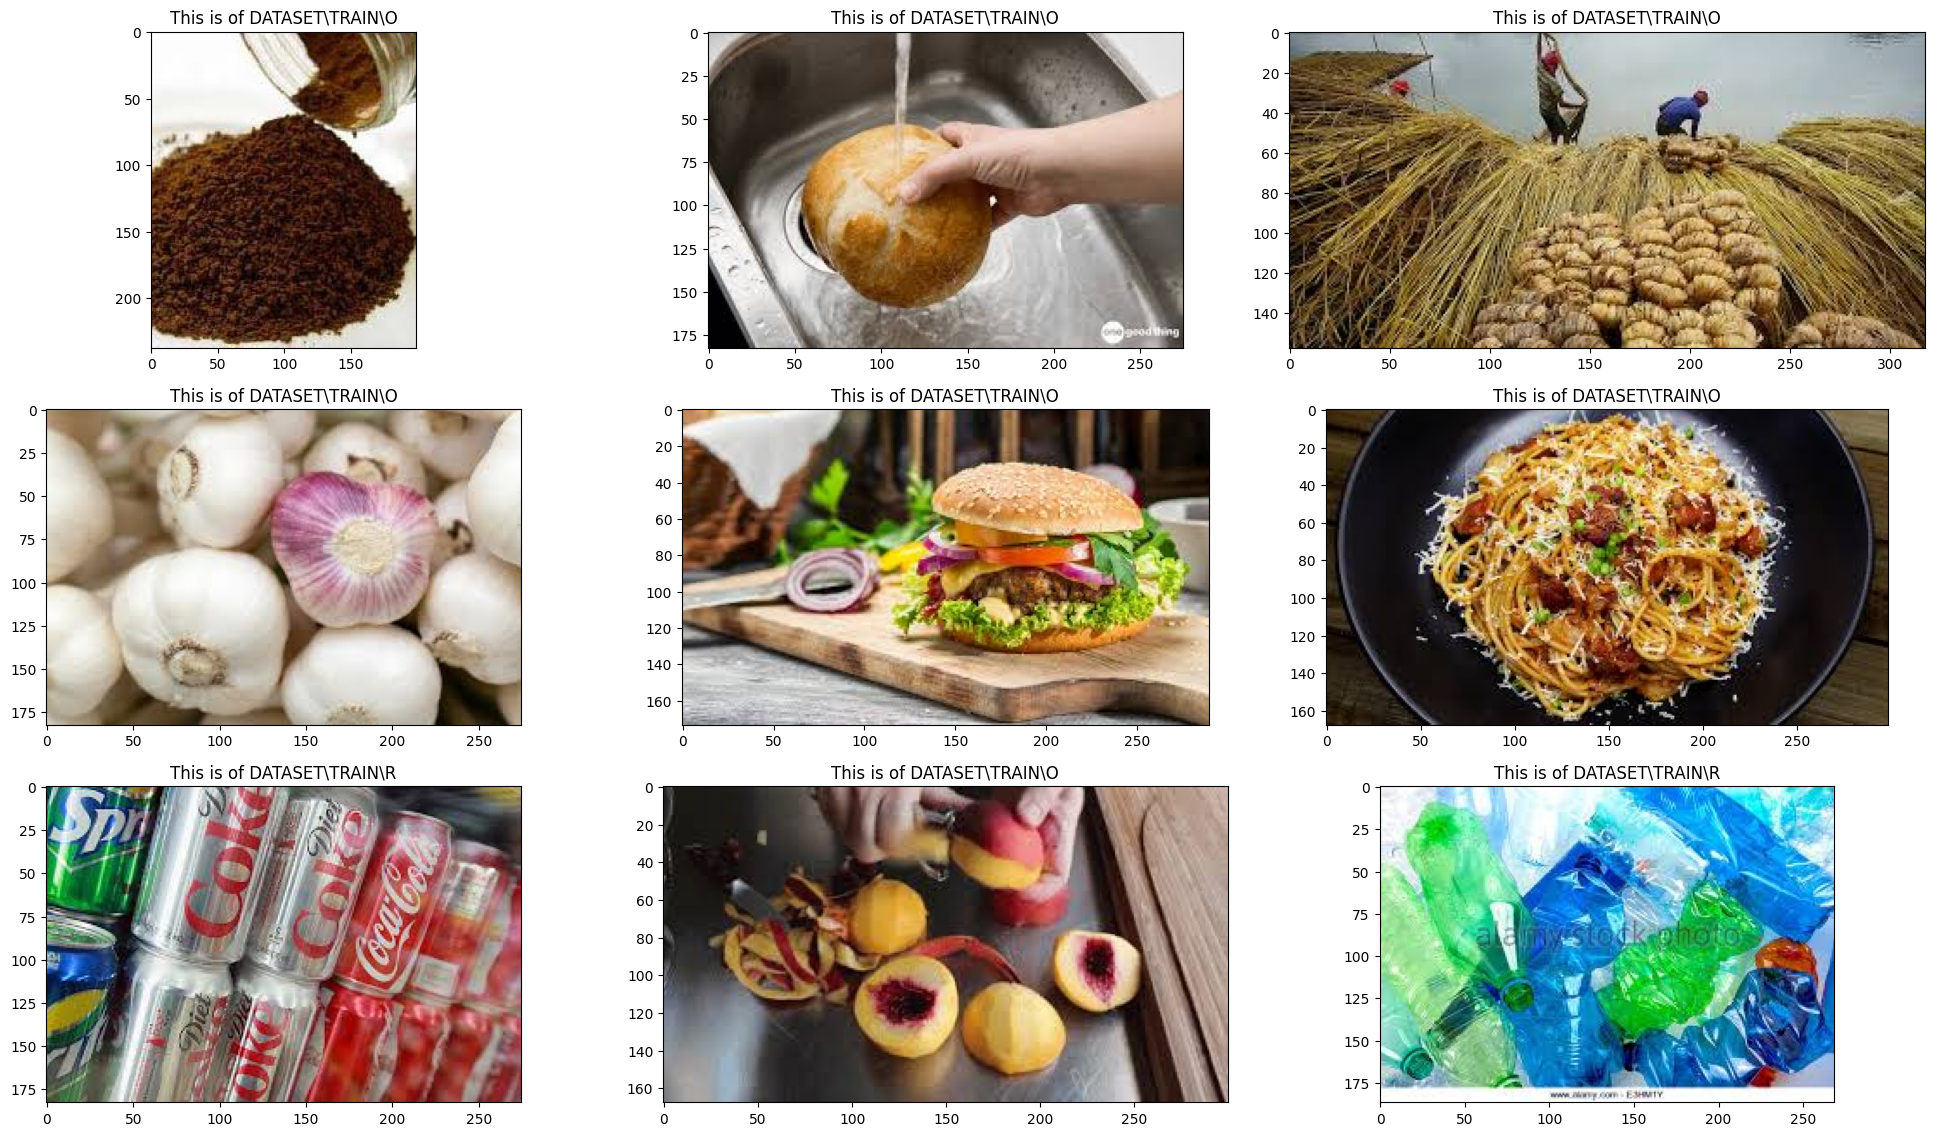

In [8]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN MODEL

In [ ]:
#starting one by one sequentially
model = Sequential()
#Conv2D layer is filter layer here 32 filters
#and kernel size is 3 by 3 (3, 3) 
#(224, 224)input image resolution will be (pixel size) 
# 224x224 (original is 1920x1080) 
#3 stand for 3 channels RGB 
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
#activation is used to made non-linearity in data. 
#if data is linear it might get errors. relu
model.add(Activation('relu')) 
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# to make images 1dimensional while training that are 2D (Conv2D)
model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2)) #only 2 class organic and recyclable
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10


706/706 [==============================] - 540s 749ms/step - loss: 0.4856 - accuracy: 0.7960 - val_loss: 0.3145 - val_accuracy: 0.8842
Epoch 2/10
706/706 [==============================] - 510s 723ms/step - loss: 0.4052 - accuracy: 0.8331 - val_loss: 0.3224 - val_accuracy: 0.8587
Epoch 3/10
706/706 [==============================] - 511s 724ms/step - loss: 0.3653 - accuracy: 0.8549 - val_loss: 0.2867 - val_accuracy: 0.8834
Epoch 4/10
706/706 [==============================] - 513s 727ms/step - loss: 0.3294 - accuracy: 0.8683 - val_loss: 0.3290 - val_accuracy: 0.8770
Epoch 5/10
706/706 [==============================] - 530s 751ms/step - loss: 0.3028 - accuracy: 0.8822 - val_loss: 0.2828 - val_accuracy: 0.8898
Epoch 6/10
706/706 [==============================] - 527s 746ms/step - loss: 0.2685 - accuracy: 0.8970 - val_loss: 0.2610 - val_accuracy: 0.9001
Epoch 7/10
706/706 [==============================] - 517s 731ms/step - loss: 0.2274 - accuracy: 0.9149 - val_loss: 0.3097

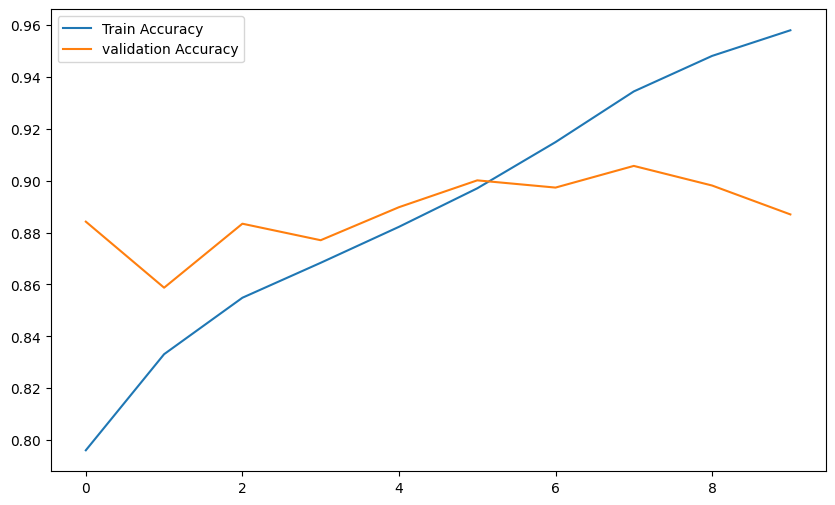

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='validation Accuracy')
plt.legend() #for notation of curves
plt.show()

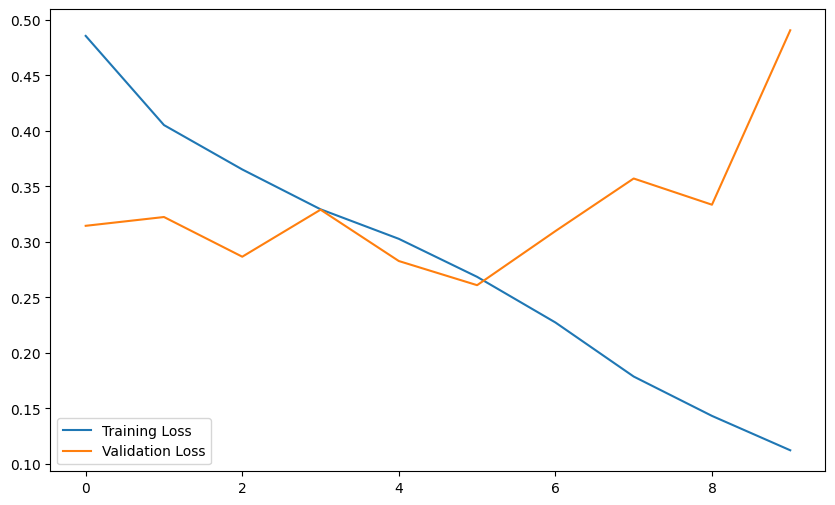

In [17]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [28]:
def predict_fun(img):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result ==0:
        print('The Image Shown is Recylcable Waste')    
    elif result == 1:
        print('The Image Shown is Organic Waste')

1/1 [==============================] - 0s 72ms/step
The Image Shown is Organic Waste


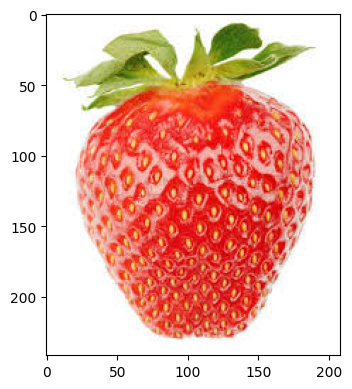

In [33]:
test_img = cv2.imread('DATASET\TRAIN\O\O_1.jpg')
predict_fun(test_img)